# Pandas y Valores Faltantes




1. Abrir el dataset e imprimir sus primeras instancias.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt


In [95]:
wine_reviews = pd.read_csv('wine_reviews.csv')
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


2. ¿Cuántas columnas (features) tiene?¿Cuáles son sus nombres?¿Y cuántas filas (instancias)? Luego, descartar la columna `'Unnamed: 0'`.

In [96]:
print("Cantidad de columnas:",wine_reviews.shape[1],"\n")
print("Cantidad de filas:",wine_reviews.shape[0],"\n")
[i for i in wine_reviews.columns]



Cantidad de columnas: 14 

Cantidad de filas: 129971 



['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

Descartando la columna "Unnamed: 0" del dataframe

In [97]:
wine_reviews.drop(columns="Unnamed: 0", inplace=True)

3. ¿Cuántos valores faltantes hay en cada columna?

In [99]:
wine_reviews.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

4. ¿Cuál es el vino con más valores faltantes?

In [100]:
max_empty = wine_reviews.isna().sum(axis=1).idxmax()
print(f"El vino con mas valores faltantes es",wine_reviews.loc[max_empty]["title"],
      "que tiene el Id",wine_reviews.isna().sum(axis=1).idxmax()
      )

El vino con mas valores faltantes es Carmen 1999  (Maipo Valley) que tiene el Id 86909


5. Hacerse alguna pregunta acerca del dataset e intentar responderla. Por ejemplo, ¿cuáles son el peor y el mejor vino? Imprimir en pantalla sus características y su descripción. ¿Hay un solo vino que sea el mejor o el peor?

¿Cuantos vinos tienen un precio mayor al de la media?

In [101]:
avg = wine_reviews["price"].mean()

total = wine_reviews["price"].count()

amount = len(wine_reviews[wine_reviews["price"] > avg].count(axis=1))
print("Cantidad de vinos que tienen un precio mayor al de la media:",amount)
print(f"Representan el %{round(amount * 100 / total,2)} de los vinos")

Cantidad de vinos que tienen un precio mayor al de la media: 39743
Representan el %32.85 de los vinos


## Trabajando con datos faltantes

Antes de realizar cada una de las siguientes consignas, recordá copiar el dataset en una nueva variable, así mantemos el dataset original sin modificar.

1. Descartar aquellas filas que tengan algún valor faltante. ¿Cuántas instancias quedan en el dataset?

In [102]:
copy_wine_reviews = wine_reviews.copy()

In [103]:
copy_wine_reviews.dropna(inplace=True)

In [112]:
lines_1 = wine_reviews.shape[0]
lines_2 = copy_wine_reviews.shape[0]
print(f"Se eliminaron {lines_1 - lines_2} filas")

Se eliminaron 107584 filas


2. Descartar aquellas columnas que tengan algún valor faltante. ¿Cuántos y cuáles atributos quedaron?

In [117]:
copy_wine_reviews.dropna(axis=1, inplace= True)
print(wine_reviews.shape[1])
print(copy_wine_reviews.shape[1])

13
13


*No se elimino ninguna columna*

Pueden observar que descartar sin ningún criterio puede hacer que perdamos muchos datos.

Tratemos de mejorar un poco los criterios con los que descartamos.

3. Descartar aquellas filas que tengan más de tres valores faltantes. ¿Cuántas instancias quedaron?

In [133]:
ii_wine_reviews = wine_reviews.copy()
ii_wine_reviews.dropna(thresh=3)
print(ii_wine_reviews.shape)
print("No se elimino ninguna fila")

(129971, 13)
No se elimino ninguna fila


4. Descartar aquellas columnas que tengan más del 50% de valores faltantes. ¿Cuántos y cuáles atributos quedaron? Luego, descartar las instancias que tengan algún valor faltante.

In [155]:
filas = len(ii_wine_reviews.index)
condicion = filas * 0.5
ii_wine_reviews.dropna(axis=1, thresh=condicion, inplace = True)
print("Ahora hay",ii_wine_reviews.shape[1],"columnas")


Ahora hay 12 columnas


In [161]:
ii_wine_reviews.dropna(inplace=True)
ii_wine_reviews

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
...,...,...,...,...,...,...,...,...,...,...,...,...
129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,Roger Voss,@vossroger,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


**Moraleja**: el orden importa. Primero, podemos descartar aquellas columnas con muchos valores faltantes y después descartar aquellas instancias con valores faltantes.

**Para pensar:** ¿de qué tipo son las variables del dataset?¿Es lo mismo un valor faltante en `price` que en `variety`?

**Ejercicio**

Hasta ahora, estamos descartando columnas y/o instancias sin prestar mucha atención qué representa cada columna. Elegir alguno de los siguientes objetivos y hacer un manejo de valores faltantes que consideren apropiado para ese objetivo:

* Predecir el precio de un vino. 
* Predecir la variedad de un vino.

Prestar atención a si no hay información redundante en las columnas.


## Imputación de Valores Faltantes

La columna `price` tiene alrededor de 9 mil valores faltantes, pero no queremos descartarla ni descartar instancias por el simple hecho de que no sepamos su precio. Esto se debe a que el precio tiene mucha información y, eventualmente, puede ser la columna que querramos predecir. Además, no son tantos valores faltantes si consideramos la cantidad de instancias que tiene el dataset. Entonces:


1. Calcular el valor medio, moda, mediana y la desviación estándar de la columna `price`.

In [162]:
print("Valor promedio:",wine_reviews.price.mean())
print("Desviacion mediana:",wine_reviews.price.median())
print("Desviacion estandar:",wine_reviews.price.std())
print("Valor modal:",wine_reviews.price.mode())

Valor promedio: 35.363389129985535
Desviacion mediana: 25.0
Desviacion estandar: 41.02221766808723
Valor modal: 0    20.0
Name: price, dtype: float64


2. Imputar los valores faltantes en la columna `price` usando su valor medio.

In [170]:
avg = wine_reviews.price.mean()
avg

35.363389129985535

In [168]:
avg = wine_reviews.price.mean()
wine_reviews.fillna(value={"price": avg})

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.000000,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.000000,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


3. ¿Cambió el valor medio de la columna?¿Y su desviación estándar?¿Y los otros estadísticos que calculamos?¿Por qué?

In [172]:
print("Valor promedio:",wine_reviews.price.mean())
print("Desviacion mediana:",wine_reviews.price.median())
print("Desviacion estandar:",wine_reviews.price.std())
print("Valor modal:",wine_reviews.price.mode())

Valor promedio: 35.363389129985535
Desviacion mediana: 25.0
Desviacion estandar: 41.02221766808723
Valor modal: 0    20.0
Name: price, dtype: float64


*Las metricas estadisticas no cambiaron en lo absoluto ya que los valores faltantes originalmente no estaban incluidos en el cálculo de estas medidas estadísticas y los nuevos valores imputados se consideran como valores válidos.*

4. Volver a correr las celdas anteriores, pero completando los valores faltantes con la mediana y luego la moda.

In [176]:
median = wine_reviews.price.median()
wine_reviews.fillna(value={"price": median})
wine_reviews.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [180]:
mode = wine_reviews.price.mode()
wine_reviews.fillna(value={"price": mode})
wine_reviews.head(5)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


5. Trabajar con un dataset sin visualizar es muy aburrido y, diríamos, casi frustrante. Mientras tanto, intenten hacer un histograma de los puntajes asignados y, luego, de los precios.

In [187]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma de valores de la columna points')

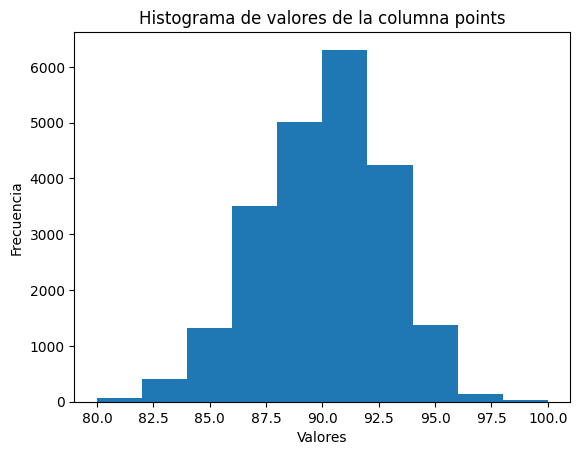

In [192]:
points = plt.hist(copy_wine_reviews.points)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de valores de la columna points")  

Text(0.5, 1.0, 'Histograma de valores de la columna price')

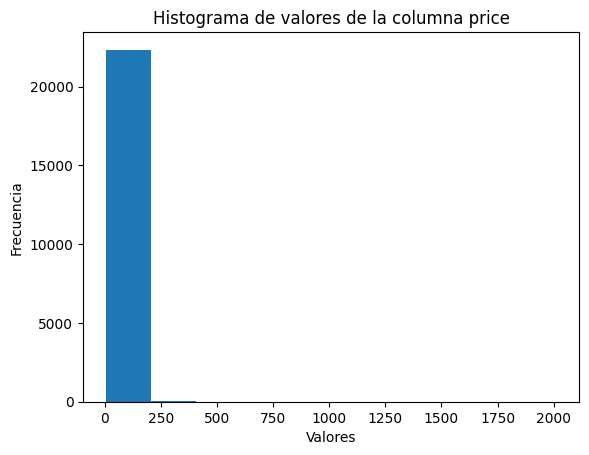

In [200]:
prices = plt.hist(copy_wine_reviews.price,rwidth=5)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de valores de la columna price")  